# Data Description und Analyse
Dieses Notebook erfüllt die Anforderungen von Teil 2 der Projektarbeit. Ziel ist es, den Datensatz zu analysieren, ein Zielfeld für die Vorhersage auszuwählen, statistische Informationen zu berechnen, Visualisierungen zu erstellen und die Daten zu skalieren.

## 2.1 Vorhersage-Zielfeld


Das Zielfeld für die Vorhersage ist `median_house_value` (Median-Hauspreis). Dieses Feld wurde gewählt, da es ein kontinuierliches numerisches Feld ist, das sich gut für Regressionsprobleme eignet.

In [1]:
# Importieren der benötigten Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pathlib import Path

# Exakter Pfad zur Excel-Datei
file_path = 'ml-classification--Immobilienpreise-.xlsx'

# Daten laden
try:
    df = pd.read_excel('ml-classification--Immobilienpreise-.xlsx')
    print("Daten erfolgreich geladen!")
    print("Erste Zeilen des Datensatzes:")
    print(df.head())
except Exception as e:
    print(f"Fehler beim Laden der Daten: {e}")


Daten erfolgreich geladen!
Erste Zeilen des Datensatzes:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0     -12223      3788                 410         8800          1290.0   
1     -12222      3786                 210        70990         11060.0   
2     -12224      3785                 520        14670          1900.0   
3     -12225      3785                 520        12740          2350.0   
4     -12225      3785                 520        16270          2800.0   

   population  households  median_income  median_house_value ocean_proximity  
0        3220        1260          83252             4526000        NEAR BAY  
1       24010       11380          83014             3585000        NEAR BAY  
2        4960        1770          72574             3521000        NEAR BAY  
3        5580        2190          56431             3413000        NEAR BAY  
4        5650        2590          38462             3422000        NEAR BAY  


## 2.2 Statistische Informationen


In [2]:
# Liste aller numerischen Spalten
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Statistische Übersicht für alle numerischen Spalten
print("Statistische Informationen für numerische Spalten:")
print(df[numeric_columns].describe())

# Detaillierte Statistiken für das Zielfeld
target_variable = 'median_house_value'
print(f"\nDetaillierte Statistiken für {target_variable}:")
print(f"Mittelwert: {df[target_variable].mean():.2f}")
print(f"Median: {df[target_variable].median():.2f}")
print(f"Standardabweichung: {df[target_variable].std():.2f}")
print(f"Varianz: {df[target_variable].var():.2f}")
print(f"Minimum: {df[target_variable].min():.2f}")
print(f"Maximum: {df[target_variable].max():.2f}")


Statistische Informationen für numerische Spalten:
          longitude      latitude  housing_median_age    total_rooms  \
count  20640.000000  20640.000000        20640.000000   20640.000000   
mean  -10910.362452   3245.565068          286.394864   26357.630814   
std     3195.078706    979.442107          125.855576   21816.152516   
min   -12435.000000    326.000000           10.000000      20.000000   
25%   -12152.000000   3382.000000          180.000000   14477.500000   
50%   -11837.000000   3415.000000          290.000000   21270.000000   
75%   -11775.000000   3762.250000          370.000000   31480.000000   
max    -1146.000000   4195.000000          520.000000  393200.000000   

       total_bedrooms     population    households  median_income  \
count    20433.000000   20640.000000  20640.000000   20640.000000   
mean      5378.705525   14254.767442   4995.396802   33542.506541   
std       4213.850701   11324.621218   3823.297528   22026.706582   
min         10.000000   

## 2.3 Visualisierung

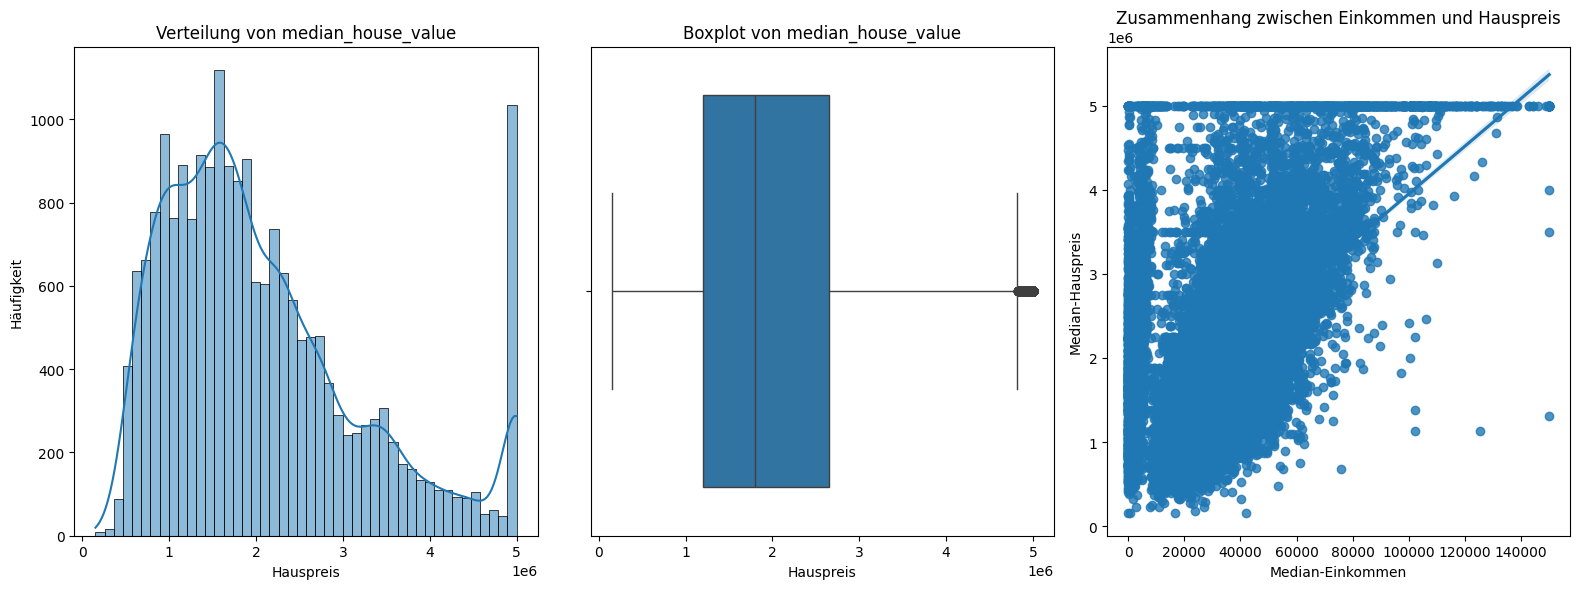

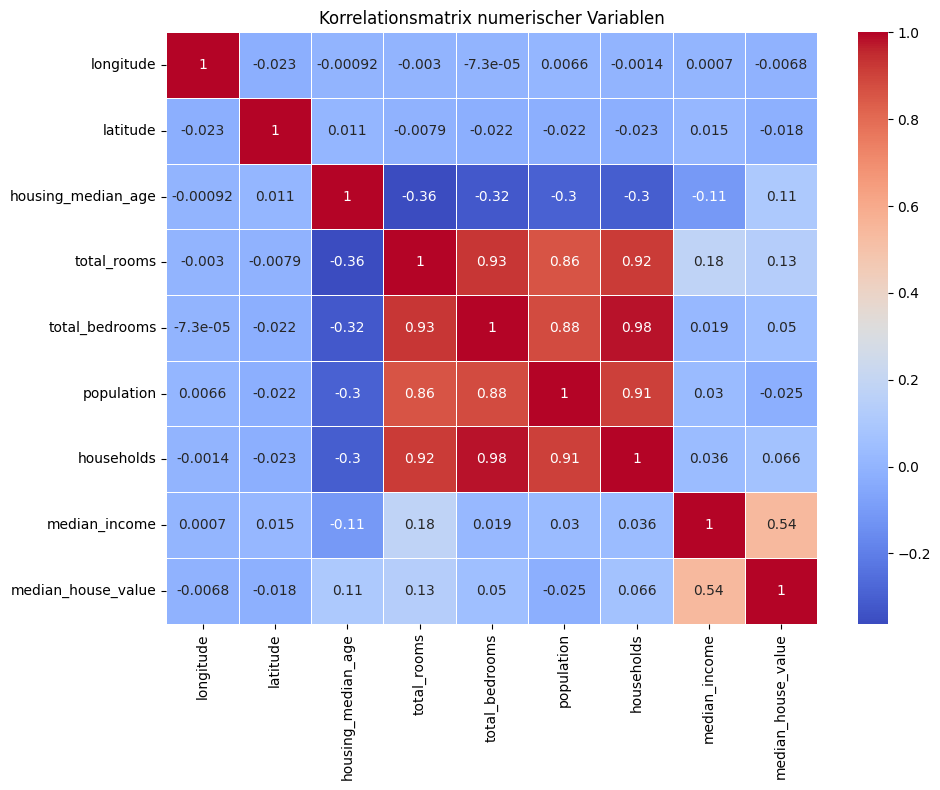

In [4]:
# Visualisierungen erstellen
plt.figure(figsize=(16, 6))

# Histogramm für Median-Hauspreis
plt.subplot(1, 3, 1)
sns.histplot(df[target_variable], kde=True)
plt.title(f'Verteilung von {target_variable}')
plt.xlabel('Hauspreis')
plt.ylabel('Häufigkeit')

# Boxplot für Median-Hauspreis
plt.subplot(1, 3, 2)
sns.boxplot(x=df[target_variable])
plt.title(f'Boxplot von {target_variable}')
plt.xlabel('Hauspreis')

# Regressionsplot: Median-Einkommen vs. Hauspreis
plt.subplot(1, 3, 3)
sns.regplot(x='median_income', y=target_variable, data=df)
plt.title('Zusammenhang zwischen Einkommen und Hauspreis')
plt.xlabel('Median-Einkommen')
plt.ylabel('Median-Hauspreis')

plt.tight_layout()
plt.show()

# Korrelationsmatrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korrelationsmatrix numerischer Variablen')
plt.tight_layout()
plt.show()


## 2.4 Skalierung

Die Skalierung der numerischen Felder ist sinnvoll, da:

1. Die Variablen unterschiedliche Größenordnungen und Skalen haben
2. Maschinelle Lernalgorithmen von skalierten Daten profitieren

### Standardisierung mit StandardScaler
- Berechnet Mittelwert und Standardabweichung
- Transformiert Daten, sodass sie einen Mittelwert von 0 und eine Standardabweichung von 1 haben
- Besonders nütztig für Algorithmen, die Abstandsberechnungen verwenden


In [5]:
# Spalten zum Skalieren auswählen
columns_to_exclude = [target_variable, 'ocean_proximity']
columns_to_scale = [col for col in numeric_columns if col not in columns_to_exclude]

# Skalierung durchführen
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Vergleich vor und nach Skalierung
print("Vergleich vor und nach Skalierung:")
comparison = pd.DataFrame({
    'Original Mittelwert': df[columns_to_scale].mean(),
    'Original Standardabweichung': df[columns_to_scale].std(),
    'Skaliert Mittelwert': df_scaled[columns_to_scale].mean(),
    'Skaliert Standardabweichung': df_scaled[columns_to_scale].std()
})
print(comparison)


Vergleich vor und nach Skalierung:
                    Original Mittelwert  Original Standardabweichung  \
longitude                 -10910.362452                  3195.078706   
latitude                    3245.565068                   979.442107   
housing_median_age           286.394864                   125.855576   
total_rooms                26357.630814                 21816.152516   
total_bedrooms              5378.705525                  4213.850701   
population                 14254.767442                 11324.621218   
households                  4995.396802                  3823.297528   
median_income              33542.506541                 22026.706582   

                    Skaliert Mittelwert  Skaliert Standardabweichung  
longitude                 -1.707506e-16                     1.000024  
latitude                   2.203233e-17                     1.000024  
housing_median_age        -7.711317e-17                     1.000024  
total_rooms               -1.101